## Geometric Transformations
Geometric transformations are operations that modify the geometric properties of images, such as size, orientation, and perspective. Some common geometric transformations include scaling, rotation, translation, and affine transformations.

## Why are Geometric Transformations Important?
Geometric transformations are essential for many computer vision tasks, such as image stitching, object tracking, and image registration. By transforming images, you can align them, change their perspective, or resize them to fit specific requirements, which helps improve the performance of computer vision algorithms.

## The Theory Behind Geometric Transformations
Geometric transformations can be represented as mathematical operations applied to the pixel coordinates of an image. The transformed pixel coordinates can be calculated using transformation matrices, which define how the input image is transformed into the output image.

In OpenCV, geometric transformations can be performed using functions like resize(), warpAffine(), and warpPerspective().

## Geometric Transformations with OpenCV

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load an image

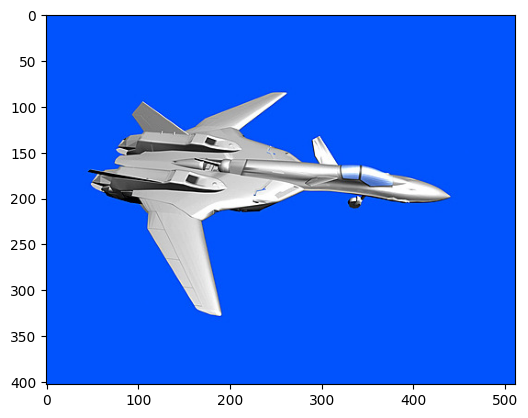

In [2]:
img = cv2.imread('./images/plane.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#### 1. Scalling

Original Image Shape:  (403, 511, 3)
Scaled Image Shape:  (201, 255, 3)


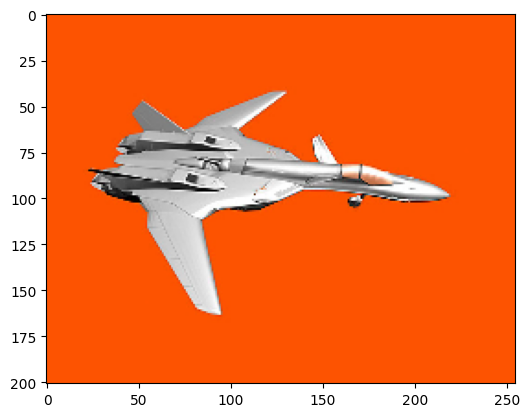

In [6]:
def resize_image(img, scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    return resized

scaled_image = resize_image(img, 50)
scaled_image = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
print("Original Image Shape: ", img.shape)
print("Scaled Image Shape: ", scaled_image.shape)
plt.imshow(scaled_image)

#### 2. Rotation

In [11]:
import cv2

def rotate_image(img, angle, center=None, scale=1.0):
    (h, w) = img.shape[:2]

    if center is None:
        center = (w // 2, h // 2)

    # Get the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale)
    
    # Perform the affine transformation (rotation)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    return rotated


Original Image Shape:  (403, 511, 3)
Rotated Image Shape:  (403, 511, 3)


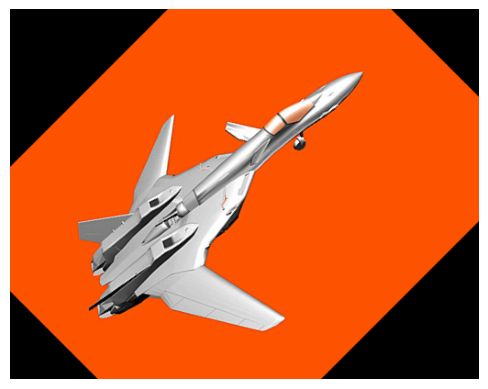

In [18]:
rotated_image = rotate_image(img, 45)
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
print("Original Image Shape: ", img.shape)
print("Rotated Image Shape: ", rotated_image.shape)
# Plot the rotated image
plt.imshow(rotated_image_rgb)
plt.axis('off')  # Hide axis
plt.show()

#### 3. Translation

In [17]:
def translate_image(img, x_shift, y_shift):
    M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    print(M.shape)
    translated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return translated

(2, 3)
Original Image Shape:  (403, 511, 3)
Translated Image Shape:  (403, 511, 3)


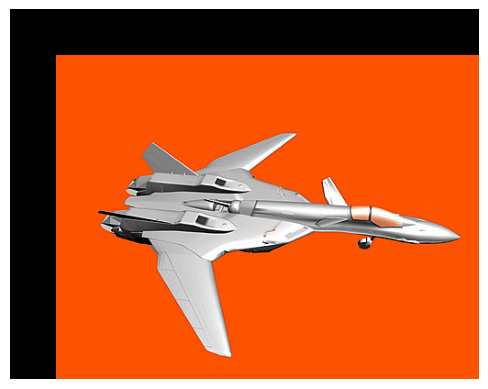

In [19]:
translated_image = translate_image(img, 50, 50)
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)
print("Original Image Shape: ", img.shape)
print("Translated Image Shape: ", translated_image_rgb.shape)
# Plot the translated image
plt.imshow(translated_image_rgb)
plt.axis('off')  # Hide axis
plt.show()

#### 4. Affine Transformations
Affine transformations are a combination of scaling, rotation, and translation that maintain parallelism between lines.

In [20]:
def apply_affine_transform(img, src_points, dst_points):
    M = cv2.getAffineTransform(src_points, dst_points)
    transformed = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return transformed

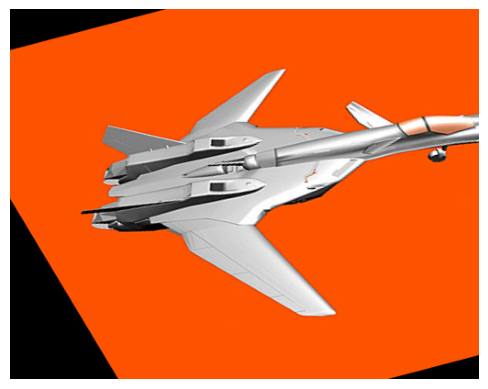

In [21]:
src_pts = np.float32([[50, 50], [200, 50], [50, 200]])  #src_points: The source points, which are three points in the original image that define a triangle.
dst_pts = np.float32([[10, 100], [200, 50], [100, 250]]) #dst_points: The destination points, which specify where each source point should be mapped in the transformed image

affine_transformed_image = apply_affine_transform(img, src_pts, dst_pts)
affine_transformed_image_rgb = cv2.cvtColor(affine_transformed_image, cv2.COLOR_BGR2RGB)

plt.imshow(affine_transformed_image_rgb)
plt.axis('off')  # Hide axis
plt.show()

#### 5. Perspective Transformations
Perspective transformations change the perspective of an image, such as simulating a 3D effect or correcting distortion. 

In [22]:
def apply_perspective_transform(img, src_points, dst_points):
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    transformed = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return transformed

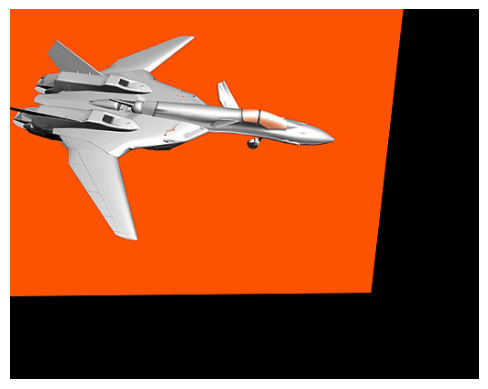

In [23]:
src_pts = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
dst_pts = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
perspective_transformed_image = apply_perspective_transform(img, src_pts, dst_pts)

perspective_transformed_image_rgb = cv2.cvtColor(perspective_transformed_image, cv2.COLOR_BGR2RGB)
plt.imshow(perspective_transformed_image_rgb)
plt.axis('off')  # Hide axis
plt.show()